# 합성곱 신경망(Convolution Neural Network)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,  
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.net/software/theano_versions/dev/_images/numerical_no_padding_no_strides.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/arbitrary_padding_no_strides.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/no_padding_strides.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의)
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

## Conv1D

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

### Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

### MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

### GlobalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터

### 데이터 로드 및 전처리

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [2]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

print(input_train[0])
print(y_train[0])

17464789/17464789 [==============================] - 0s 0us/step
25000
25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 53

In [3]:
pad_x_train = pad_sequences(input_train, maxlen=max_len)
pad_x_test = pad_sequences(input_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


### 모델 구성

In [6]:
def build_model():
    model = Sequential()

    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
    model.add(Conv1D(32, 7, activation='relu'))
    model.add(MaxPooling1D(7))
    model.add(Conv1D(32, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [7]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1  (None, 70, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 13, 32)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0

### 모델 학습

In [8]:
history = model.fit(pad_x_train, y_train,
                    batch_size=128,
                    epochs=30,
                    validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 21s 108ms/step - loss: 0.6936 - acc: 0.5059 - val_loss: 0.6922 - val_acc: 0.5336
Epoch 2/30
157/157 [==============================] - 12s 75ms/step - loss: 0.6918 - acc: 0.5626 - val_loss: 0.6914 - val_acc: 0.5650
Epoch 3/30
157/157 [==============================] - 9s 60ms/step - loss: 0.6902 - acc: 0.6050 - val_loss: 0.6899 - val_acc: 0.6058
Epoch 4/30
157/157 [==============================] - 8s 54ms/step - loss: 0.6876 - acc: 0.6351 - val_loss: 0.6868 - val_acc: 0.6426
Epoch 5/30
157/157 [==============================] - 6s 38ms/step - loss: 0.6825 - acc: 0.6797 - val_loss: 0.6796 - val_acc: 0.6784
Epoch 6/30
157/157 [==============================] - 5s 35ms/step - loss: 0.6708 - acc: 0.7049 - val_loss: 0.6628 - val_acc: 0.6904
Epoch 7/30
157/157 [==============================] - 4s 27ms/step - loss: 0.6468 - acc: 0.7269 - val_loss: 0.6308 - val_acc: 0.7370
Epoch 8/30
157/157 [==============================] - 4s 26ms/step

### 시각화

<ipython-input-13-14b5e7fcd244>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


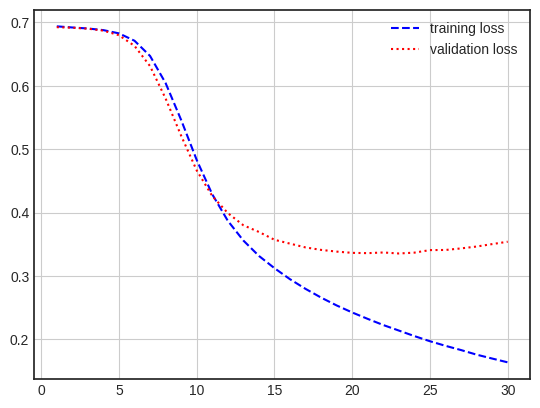

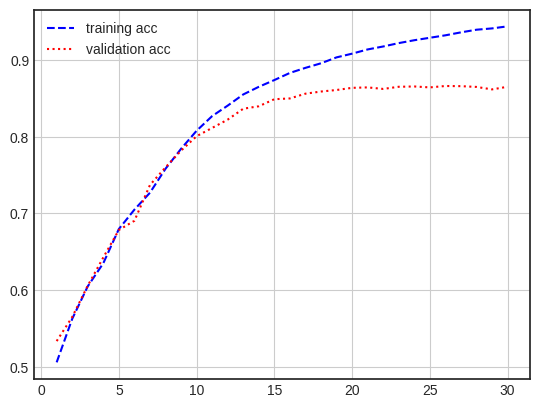

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()
plt.show()

In [14]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.3698 - acc: 0.8476


[0.3698192834854126, 0.8476399779319763]

## Reuters 데이터

### 데이터 로드 및 전처리

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [13]:
num_words = 10000
max_len = 500

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

print(input_train[0])
print(y_train[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [14]:
pad_x_train = pad_sequences(input_train, maxlen=max_len)
pad_x_test = pad_sequences(input_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(8982, 500)
(2246, 500)


### 모델 구성

In [15]:
def build_model():
    model = Sequential()

    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
    model.add(Conv1D(64, 7, activation='relu'))
    model.add(MaxPooling1D(7))
    model.add(Conv1D(64, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(46, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
    return model

In [16]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 conv1d_4 (Conv1D)           (None, 494, 64)           14400     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 70, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 66, 64)            20544     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 13, 64)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)               

### 모델 학습

In [17]:
history = model.fit(pad_x_train, y_train,
                    batch_size=128, epochs=30,
                    validation_split=0.2)

Epoch 1/30
57/57 [==============================] - 9s 121ms/step - loss: 2.7993 - acc: 0.3460 - val_loss: 2.1619 - val_acc: 0.3450
Epoch 2/30
57/57 [==============================] - 6s 106ms/step - loss: 1.9822 - acc: 0.4976 - val_loss: 1.8135 - val_acc: 0.5264
Epoch 3/30
57/57 [==============================] - 4s 77ms/step - loss: 1.7161 - acc: 0.5382 - val_loss: 1.6577 - val_acc: 0.5398
Epoch 4/30
57/57 [==============================] - 5s 93ms/step - loss: 1.5196 - acc: 0.5994 - val_loss: 1.5170 - val_acc: 0.6394
Epoch 5/30
57/57 [==============================] - 5s 84ms/step - loss: 1.3092 - acc: 0.6830 - val_loss: 1.3914 - val_acc: 0.6800
Epoch 6/30
57/57 [==============================] - 4s 73ms/step - loss: 1.1205 - acc: 0.7190 - val_loss: 1.3278 - val_acc: 0.6917
Epoch 7/30
57/57 [==============================] - 5s 85ms/step - loss: 0.9613 - acc: 0.7528 - val_loss: 1.3055 - val_acc: 0.6995
Epoch 8/30
57/57 [==============================] - 3s 45ms/step - loss: 0.8254 -

### 시각화

<ipython-input-18-14b5e7fcd244>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


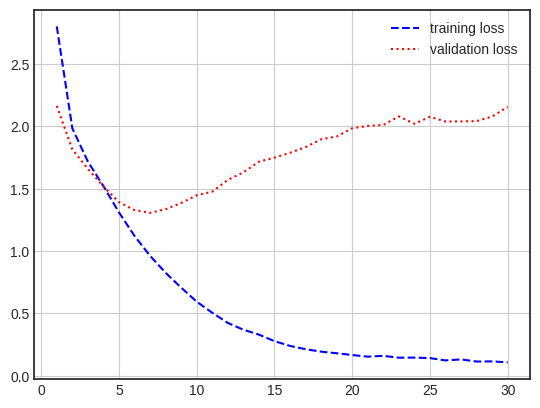

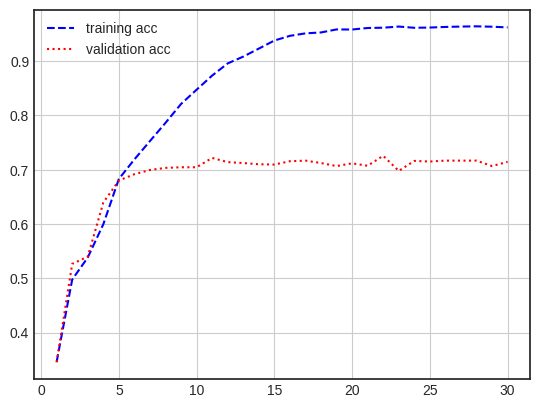

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()
plt.show()

In [19]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 2.1617 - acc: 0.7137


[2.1616873741149902, 0.7137132883071899]